In [1]:
#Task 1 : Load the scikit-learn version of the diabetes dataset into your Jupyter notebook using the load_diabetes function.
from sklearn.datasets import load_diabetes
import numpy as np
diabetes = load_diabetes()

In [2]:
#Task 2 : splitting diabetes dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes['data'],
diabetes['target'], random_state=301)

In [3]:
#Function to computes the lasso model and prints Train R2, Test R2 and Number of Features
from sklearn.linear_model import Lasso 
def getLassoScore(X_train,y_train,X_test,y_test,alpha=1):
    """
    This function computes the lasso model and prints Train R2, Test R2 and Number of Features Lasso uses
    """
    lasso = Lasso(alpha,max_iter=100000).fit(X_train,y_train) 
    lasso.score(X_train,y_train)
    print("Train R2: ",lasso.score(X_train,y_train))
    lasso.score(X_test,y_test)
    print("Test R2: ",lasso.score(X_test,y_test))
    np.sum(lasso.coef_!= 0)
    print("Number of Features used: ",np.sum(lasso.coef_!= 0))
    trueValues = np.array([])
    for index,f in enumerate(diabetes['feature_names']):
        if ((lasso.coef_!=0)[index])!=False:
            trueValues = np.append(trueValues,f)
    print("The features that Lasso uses are: ",trueValues)
    return lasso

In [4]:
#Task 3 : training and test R2 for the Lasso model using the default parameters, number of features used
import numpy as np
lasso = getLassoScore(X_train,y_train,X_test,y_test)

Train R2:  0.3645016457656399
Test R2:  0.34096724536437095
Number of Features used:  2
The features that Lasso uses are:  ['bmi' 's5']


In [5]:
#Task 4 : load the original diabetes dataset from the web page given above
X_original = np.genfromtxt("diabetes.data", delimiter="\t",
usecols=np.arange(10),skip_header=1)

In [6]:
y_original = np.genfromtxt("diabetes.data", delimiter="\t",
    usecols=10, dtype='int',skip_header=1)

In [7]:
#splitting diabetes dataset into training and test sets using 3rd January as Random state
X_original_train, X_original_test, y_original_train, y_original_test = train_test_split(X_original,
y_original, random_state=301)

In [8]:
#Task 6 : Repeat item 3 for the current dataset
lasso_original = getLassoScore(X_original_train,y_original_train,X_original_test,y_original_test)

Train R2:  0.5165159066179559
Test R2:  0.4768272585581068
Number of Features used:  10
The features that Lasso uses are:  ['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6']


In [9]:
#Comments : We see that the lasso score (R2) is better for the original dataset for both train and test

In [10]:
#Task 7 : Preprocess the training and test sets in the same way and avoiding data snooping. Use StandardScaler.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
scaler.fit(X_original_train)

StandardScaler()

In [12]:
# transform train data
X_train_scaled = scaler.transform(X_original_train) 

In [13]:
# transform test data
X_test_scaled = scaler.transform(X_original_test)

In [14]:
#Repeat Step 3
lasso_scaled = getLassoScore(X_train_scaled,y_original_train,X_test_scaled,y_original_test)

Train R2:  0.5170435495102459
Test R2:  0.4830814177499748
Number of Features used:  8
The features that Lasso uses are:  ['age' 'sex' 'bmi' 'bp' 's1' 's3' 's4' 's5']


In [15]:
#Comments : The current result for Lasso R2 for scaled dataset is closer to step 6 , reason being that the loaded data uses different normalise function.

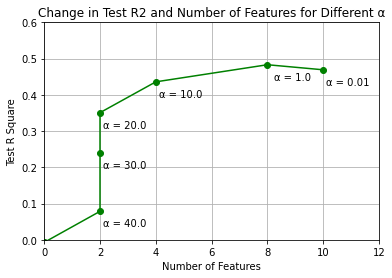

In [16]:
#Task 9 : Varying the parameter α in the Lasso, plot the test R2 vs the number of features used
import matplotlib.pyplot as plt
lasso_scaled_plot = np.array([])
no_of_features_plot = np.array([])

alpha_values = np.array([0.01, 1, 10, 20, 30, 40, 45, 50])

for alpha in alpha_values:
    #r2 for y axis
    test_r_square_diff_alpha = Lasso(alpha, max_iter=100000).fit(X_train_scaled,y_original_train)
    score_for_plot = test_r_square_diff_alpha.score(X_test_scaled,y_original_test)
    lasso_scaled_plot = np.append(lasso_scaled_plot,score_for_plot)
    
    #no of features for x axis
    no_of_features = np.sum(test_r_square_diff_alpha.coef_!= 0)
    no_of_features_plot = np.append(no_of_features_plot,no_of_features)

plt.plot(no_of_features_plot, lasso_scaled_plot,'go-')
# set the basic properties
for index, a in enumerate(lasso_scaled_plot):
    alpha = 'α = '+ str(alpha_values[index])
    plt.annotate(alpha, (no_of_features_plot[index], lasso_scaled_plot[index]),textcoords="offset points",xytext=(25,-15),ha='center')

plt.xlabel('Number of Features')
plt.ylabel('Test R Square')
plt.ylim([0, 0.6])
plt.xlim([0, 12])
plt.title('Change in Test R2 and Number of Features for Different α')
plt.grid()

In [17]:
#I prefer point with α = 1. This seems like the best fit for our model. Since increasing or decreasing α from 1 does not give better results.

In [18]:
#Task 10: Choose the regularization parameter for the Lasso using cross-validation on the training set. Train the Lasso on the whole training set using the chosen values of the parameters
from sklearn.model_selection import cross_val_score 
cross_validation_scores = np.array([])
for alpha in alpha_values:
    lasso_for_alpha = Lasso(alpha, max_iter=100000).fit(X_train_scaled,y_original_train)
    score =  np.mean(cross_val_score(lasso_for_alpha,X_train_scaled,y_original_train,cv=5))
    cross_validation_scores = np.append(cross_validation_scores,score)
    index_of_highest_score= np.argmax(cross_validation_scores)
    alpha_to_use = alpha_values[index_of_highest_score]
print("α for highest value of cross validation: ",alpha_to_use)

α for highest value of cross validation:  1.0


In [19]:
#Report the resulting training and test R2 and the number of features used
lasso_for_selected_alpha = getLassoScore(X_train_scaled,y_original_train,X_test_scaled,y_original_test,alpha_to_use)

Train R2:  0.5170435495102459
Test R2:  0.4830814177499748
Number of Features used:  8
The features that Lasso uses are:  ['age' 'sex' 'bmi' 'bp' 's1' 's3' 's4' 's5']


In [20]:
#Task 11 : Implement an inductive conformal predictor
#Task 11 (a) : Split the training set that you obtained in item 5 into two part
X_original = np.genfromtxt("diabetes.data", delimiter="\t", usecols=np.arange(10),skip_header=1)
y_original = np.genfromtxt("diabetes.data", delimiter="\t", usecols=10, dtype='int',skip_header=1)
#splitting diabetes dataset into training and test sets
X_original_train, X_original_test, y_original_train, y_original_test = train_test_split(X_original,
y_original, random_state=301)
#splitting train dataset into training and calibration sets
X_train_proper, X_calibration, y_train_proper, y_calibration = train_test_split(X_original_train,
y_original_train,test_size=99, random_state=301)

In [21]:
#Task 11 (b) : Preprocess the training set proper, calibration set, and test set in the same way using StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_proper)

StandardScaler()

In [22]:
# transform data
X_train_proper_scaled = scaler.transform(X_train_proper) 
X_calibration_scaled = scaler.transform(X_calibration) 
X_original_test_scaled = scaler.transform(X_original_test) 

In [23]:
#Task 11 (c) : Use the Lasso with parameters chosen by cross-validation on the training set proper
cross_validation_scores_proper = np.array([])
for alpha in alpha_values:
    lasso_for_alpha = Lasso(alpha, max_iter=100000).fit(X_train_proper_scaled,y_train_proper)
    score =  np.mean(cross_val_score(lasso_for_alpha,X_train_proper_scaled,y_train_proper,cv=5))
    cross_validation_scores_proper = np.append(cross_validation_scores_proper,score)
    index_of_highest_score= np.argmax(cross_validation_scores_proper)
    alpha_to_use_proper = alpha_values[index_of_highest_score]
print("α for highest value of cross validation: ",alpha_to_use_proper)

α for highest value of cross validation:  1.0


In [24]:
lasso_for_prediction = Lasso(alpha_to_use_proper, max_iter=100000).fit(X_train_proper_scaled,y_train_proper)

In [25]:
#for each test sample compute the prediction interval for it.
y_cap = lasso_for_prediction.predict(X_calibration_scaled)
calibration_score = abs(y_calibration-y_cap)
e = np.array([0.05,0.2])
y_test_pred = lasso_for_prediction.predict(X_original_test_scaled)
for index, e_value in enumerate(e):
    k = int(np.ceil((1-e_value)*(len(y_calibration)+1)))
    score_partially_sorted = np.argpartition(calibration_score,k)
    offset = calibration_score[score_partially_sorted[k]]
    print(f"Length of Interval for ϵ value {e_value}: ", 2*offset)
    true_condition = np.array([])
    for index,value in enumerate(y_test_pred):
        if y_original_test[index]>= (y_test_pred[index]-offset) and y_original_test[index]<= (y_test_pred[index]+offset):
            true_condition = np.append(true_condition,True)
        else:
            true_condition = np.append(true_condition,False)
    print(f"Test error Rate for ϵ value {e_value}:",(1-np.mean(true_condition)))

Length of Interval for ϵ value 0.05:  204.79142774985547
Test error Rate for ϵ value 0.05: 0.05405405405405406
Length of Interval for ϵ value 0.2:  131.53795093669004
Test error Rate for ϵ value 0.2: 0.22522522522522526
